## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum - `np.argmin`.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [20]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

In [21]:
def plot_hist(img):
    f, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(img, 'gray')
    axs[0].axis('off')
    
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    acc_hist = np.cumsum(hist)
    
    axs[1].plot(hist / np.max(hist), label='hist')
    axs[1].plot(acc_hist / np.max(acc_hist), label='acc hist')
    axs[1].grid()
    axs[1].legend()
    plt.show()

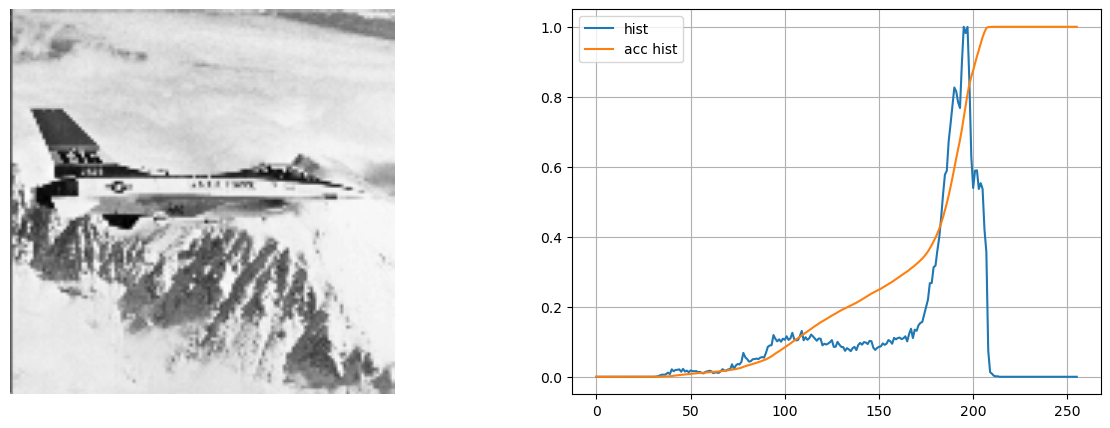

In [22]:
img = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plot_hist(img)

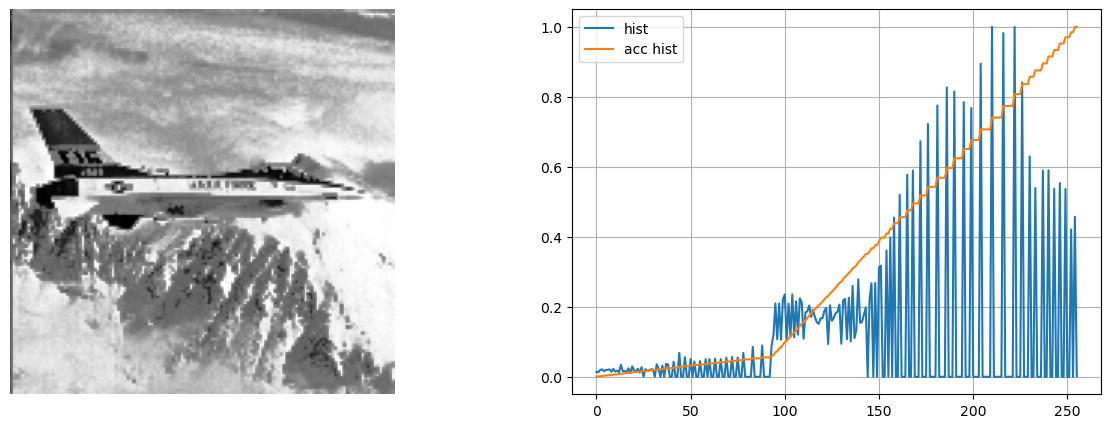

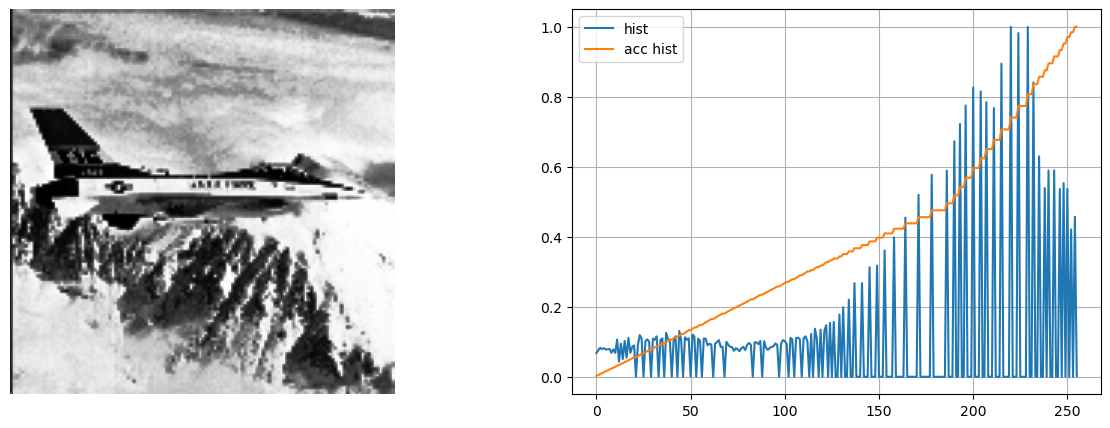

In [23]:
lm1 = int(np.median(img) / 2)  # BBHE
lm2 = np.argmin(np.abs(np.cumsum(hist) - np.sum(hist)/2))  # DSIHE

for lm in [lm1, lm2]:
    H1 = np.cumsum(hist[:lm+1])
    H2 = np.cumsum(hist[lm+1:])
    
    C1 = H1 / np.max(H1)
    C2 = H2 / np.max(H2)
    
    lower_lut = lm * C1
    upper_lut = lm + 1 + (255 - lm - 1) * C2
    
    lut = np.concatenate((lower_lut, upper_lut)).astype(np.uint8)
    
    img_eq = cv2.LUT(img, lut)
    
    plot_hist(img_eq)